In [27]:
from gensim.models.doc2vec import LabeledSentence
from gensim.models.doc2vec import TaggedLineDocument
from gensim.models.doc2vec import Doc2Vec
from gensim import utils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
class File2DocSpace(Doc2Vec):
    
    def __init__(self, file_name, epochs=1, size=20,
                 window=3,
                 min_count=2, workers=1,
                 alpha=0.5, min_alpha=0.025, batch_words=30,
                 train= True):
    
        self.file_name = file_name
        self.D, self.y = self.load_data()
        self.epochs = epochs
        super(File2DocSpace, self).__init__(self.D, size=20,
                                            window=3,
                                            min_count=2, workers=1,alpha=0.5,
                                            min_alpha=0.025, batch_words=30)
        if train:
            self.train2()
            self.X = np.asarray(self.docvecs)

    def load_data(self):
        with open(self.file_name) as f:
            lines = f.readlines()

        labels = list()
        all_dat = list()
        for i, l in enumerate(lines):

            labels.append(int(l[0]))

            l = gensim.utils.any2unicode(l)
            all_dat.append(LabeledSentence(l.split("\t")[-1], [i]))

        return all_dat, np.asarray(labels)

    def train2(self):
        for epoch in range(self.epochs):
            print "epoch: ", epoch
            self.train(self.D)
            self.alpha -= 0.002  # decrease the learning rate
            self.min_alpha = model.alpha  # fix the learning rate, no decay

In [ ]:
model = File2DocSpace("training_data.txt")

In [22]:
for epoch in range(10):
    model.train(all_dat)
    model.alpha -= 0.002  # decrease the learning rate
    model.min_alpha = model.alpha  # fix the learning rate, no decay


In [24]:
model.docvecs[0]

array([ -4.16080618,   7.86999989,  -4.46199608,   7.13694048,
         3.10698271,  -2.88840127,   1.74471748,  -0.97182751,
         5.87341976,   6.100739  ,   1.21941137,  -3.40129614,
         1.46895027,   3.24989533,  -5.19673252,  -3.19910502,
        10.21798515,   0.87634373,  -5.62255907,  -7.26466751], dtype=float32)

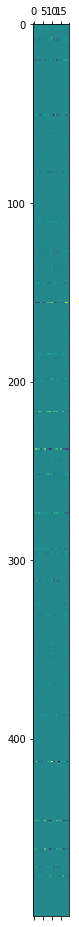

In [34]:
plt.matshow(np.asarray(model.docvecs)[0:500, :])

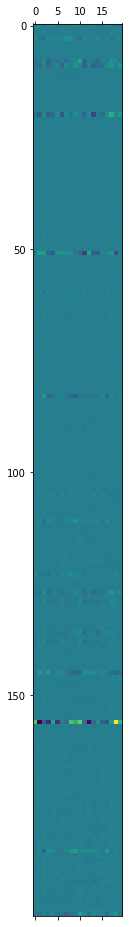

In [36]:
plt.matshow(np.asarray(model.docvecs)[0:200, 0:20])